In [97]:
# packages

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

import itertools 

%matplotlib inline

In [2]:
df_info = pd.read_csv('cc_info.csv',encoding='latin-1', header=0)



In [3]:
df_info

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
...,...,...,...,...,...
979,8938296722055540,Houston,PA,15342,36000
980,2756688131944353,Washington,NH,3280,15000
981,5783648852115715,Washington,NH,3280,20000
982,8259854075192493,Omaha,GA,31821,10000


In [5]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [6]:
df_info.describe()

,credit_card,zipcode,credit_card_limit
count,9.840000e+02,984.000000,984.000000
mean,5.410432e+15,17895.316057,12321.138211
std,2.545234e+15,23778.651105,7398.449174
min,1.003715e+15,690.000000,2000.000000
25%,3.316062e+15,3280.000000,7000.000000
50%,5.365218e+15,5820.000000,10000.000000
75%,7.562153e+15,18101.250000,16000.000000
max,9.999757e+15,98401.000000,55000.000000


In [7]:
df_info.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [9]:
df_trans = pd.read_csv('transactions.csv',encoding='latin-1', header=0)

df_trans

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162


In [10]:
df_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [12]:
df_trans['date'] = pd.to_datetime(df_trans['date']) # change a column from string format to datetime format



In [20]:
df_trans

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162


In [15]:
sum(df_info.duplicated(['credit_card'])) # there is no duplicates rows for ID

0

In [22]:
df_trans['month'] = df_trans.date.dt.month

In [23]:
df_trans['year'] = df_trans.date.dt.year

In [24]:
df_trans

,credit_card,date,transaction_dollar_amount,Long,Lat,month,year
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9,2015
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10,2015
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10,2015
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10,2015
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10,2015
...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,9,2015
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,8,2015
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,9,2015
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,8,2015


In [25]:
df_trans.year.unique() # only one year worth of data

array([2015])

In [27]:
df_group = df_trans.groupby(['credit_card','month'])

In [28]:
df_group.describe()

transaction_dollar_amount                          \
                                           count        mean         std   
credit_card      month                                                     
1003715054175576 7                           3.0   54.186667   38.322183   
                 8                          86.0   98.157093   91.678061   
                 9                          87.0  129.673103  161.518450   
                 10                         85.0  105.343647  125.213327   
1013870087888817 7                           4.0   70.357500   12.467521   
...                                          ...         ...         ...   
9986135779184360 10                        157.0   75.139809  141.869936   
9999757432802760 7                           1.0   77.590000         NaN   
                 8                          35.0  125.966571   53.465886   
                 9                          44.0  154.880000  170.164422   
                 10                         43.0  159.628605  135.115231   

                                                                     Long  \
                          min       25%      50%       75%     max  count   
credit_card      month                                                      
1003715054175576 7      20.94   33.2300   45.520   70.8100   96.10    3.0   
                 8       6.82   58.6825   88.940  120.1925  859.31   86.0   
                 9       0.88   66.8150   99.450  143.7800  995.35   87.0   
                 10      0.77   53.9600   93.970  121.6000  888.04   85.0   
1013870087888817 7      52.44   68.4000   73.805   75.7625   81.38    4.0   
...                       ...       ...      ...       ...     ...    ...   
9986135779184360 10      0.15   34.8400   51.330   73.0700  981.50  157.0   
9999757432802760 7      77.59   77.5900   77.590   77.5900   77.59    1.0   
                 8      11.99   90.4100  126.110  148.5150  287.75   35.0   
                 9      18.97   65.6350  126.805  172.3400  911.34   44.0   
                 10     18.36  105.3550  147.090  193.9650  896.09   43.0   

                                   ...        Lat              year          \
                             mean  ...        75%        max  count    mean   
credit_card      month             ...                                        
1003715054175576 7     -80.201562  ...  40.232719  40.242532    3.0  2015.0   
                 8     -80.217648  ...  40.277121  40.325284   86.0  2015.0   
                 9     -75.443065  ...  40.279214  40.317940   87.0  2015.0   
                 10    -77.017770  ...  40.269942  40.325918   85.0  2015.0   
1013870087888817 7     -72.100229  ...  43.209311  43.214593    4.0  2015.0   
...                           ...  ...        ...        ...    ...     ...   
9986135779184360 10    -80.213055  ...  40.270716  40.326729  157.0  2015.0   
9999757432802760 7     -82.382672  ...  33.071030  33.071030    1.0  2015.0   
                 8     -82.374809  ...  33.049385  33.083712   35.0  2015.0   
                 9     -82.365074  ...  33.029482  33.084871   44.0  2015.0   
                 10    -82.373079  ...  33.045737  33.084005   43.0  2015.0   

                                                                     
                        std     min     25%     50%     75%     max  
credit_card      month                                               
1003715054175576 7      0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
                 8      0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
                 9      0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
                 10     0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
1013870087888817 7      0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
...                     ...     ...     ...     ...     ...     ...  
9986135779184360 10     0.0  2015.0  2015.0  2015.0  2015.0  2015.0  
9999757432802760 7      NaN  2015.0  2015.0  2015.0  2015.0  2015.0  
  

In [30]:
res = df_group.sum()['transaction_dollar_amount']

In [96]:
res.reset_index()  

,credit_card,month,transaction_dollar_amount
0,1003715054175576,7,162.56
1,1003715054175576,8,8441.51
2,1003715054175576,9,11281.56
3,1003715054175576,10,8954.21
4,1013870087888817,7,281.43
...,...,...,...
3792,9986135779184360,10,11796.95
3793,9999757432802760,7,77.59
3794,9999757432802760,8,4408.83
3795,9999757432802760,9,6814.72


In [42]:
res.index

MultiIndex([(1003715054175576,  7),
            (1003715054175576,  8),
            (1003715054175576,  9),
            (1003715054175576, 10),
            (1013870087888817,  7),
            (1013870087888817,  8),
            (1013870087888817,  9),
            (1013870087888817, 10),
            (1023820165155391,  7),
            (1023820165155391,  8),
            ...
            (9981251982982618,  9),
            (9981251982982618, 10),
            (9986135779184360,  7),
            (9986135779184360,  8),
            (9986135779184360,  9),
            (9986135779184360, 10),
            (9999757432802760,  7),
            (9999757432802760,  8),
            (9999757432802760,  9),
            (9999757432802760, 10)],
           names=['credit_card', 'month'], length=3797)

In [46]:
res.index.get_level_values(0)

Int64Index([1003715054175576, 1003715054175576, 1003715054175576,
            1003715054175576, 1013870087888817, 1013870087888817,
            1013870087888817, 1013870087888817, 1023820165155391,
            1023820165155391,
            ...
            9981251982982618, 9981251982982618, 9986135779184360,
            9986135779184360, 9986135779184360, 9986135779184360,
            9999757432802760, 9999757432802760, 9999757432802760,
            9999757432802760],
           dtype='int64', name='credit_card', length=3797)

In [72]:
dict = {'ID': res.index.get_level_values(0), 'month': res.index.get_level_values(1), 'spending': res.values}  

In [73]:
new_df = pd.DataFrame(dict)

In [74]:
new_df

,ID,month,spending
0,1003715054175576,7,162.56
1,1003715054175576,8,8441.51
2,1003715054175576,9,11281.56
3,1003715054175576,10,8954.21
4,1013870087888817,7,281.43
...,...,...,...
3792,9986135779184360,10,11796.95
3793,9999757432802760,7,77.59
3794,9999757432802760,8,4408.83
3795,9999757432802760,9,6814.72


In [76]:
spending_vs_limit = new_df.merge(df_info, left_on='ID', right_on = 'credit_card')

In [78]:
spending_vs_limit['is_over_limit'] = spending_vs_limit['credit_card_limit']-spending_vs_limit['spending']

In [79]:
spending_vs_limit


,ID,month,spending,credit_card,city,state,zipcode,credit_card_limit,is_over_limit
0,1003715054175576,7,162.56,1003715054175576,Houston,PA,15342,20000,19837.44
1,1003715054175576,8,8441.51,1003715054175576,Houston,PA,15342,20000,11558.49
2,1003715054175576,9,11281.56,1003715054175576,Houston,PA,15342,20000,8718.44
3,1003715054175576,10,8954.21,1003715054175576,Houston,PA,15342,20000,11045.79
4,1013870087888817,7,281.43,1013870087888817,Washington,NH,3280,15000,14718.57
...,...,...,...,...,...,...,...,...,...
3792,9986135779184360,10,11796.95,9986135779184360,Houston,PA,15342,14000,2203.05
3793,9999757432802760,7,77.59,9999757432802760,Louisville,GA,30434,6000,5922.41
3794,9999757432802760,8,4408.83,9999757432802760,Louisville,GA,30434,6000,1591.17
3795,9999757432802760,9,6814.72,9999757432802760,Louisville,GA,30434,6000,-814.72


In [104]:
## below are the ID's for the good customers
spending_vs_limit['ID'][spending_vs_limit['is_over_limit'] < 0].unique()

array([1106824181265726, 1175962294549313, 1190980117697422,
       1246716439259317, 1280981422329509, 1460880989446247,
       1749458277555747, 1833346877787047, 1850995745665541,
       1934150487562155, 2032689281683871, 2097167243683055,
       2245942585429940, 2302576486327459, 2366928097135853,
       2505223645294729, 2542445829224998, 2610112472096585,
       2756688131944353, 2850146878241916, 2891791194252089,
       2980539633198204, 3095443081295019, 3138132199016625,
       3264419298955673, 3276369883343727, 3281814060807145,
       3355576223096097, 3369600965634913, 3370960377586437,
       3546693056773873, 3547198874425548, 3676109815092640,
       3797102737432115, 3929517687134990, 3936887050542904,
       4052848131106690, 4063875032497374, 4118286032166087,
       4298557099672376, 4318352196714983, 4324769211499741,
       4462290711836916, 4564117045739728, 4569281393242605,
       4572984294472212, 4631597686439269, 4973517790485920,
       4993234579335307,

In [ ]:
#def alert(date):
    

In [99]:
df_trans['hour'] = df_trans.date.dt.hour

In [ ]:
### df_trans[df_trans['credit_card']==1003715054175576]

In [102]:
df_trans['weekday'] = df_trans['date'].dt.weekday

# calculate transaction medium amount for each ID


In [105]:
df_trans

,credit_card,date,transaction_dollar_amount,Long,Lat,month,year,hour,weekday
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9,2015,0,4
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10,2015,22,5
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10,2015,18,0
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10,2015,19,3
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10,2015,20,0
...,...,...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,9,2015,19,3
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,8,2015,21,3
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,9,2015,16,1
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,8,2015,18,3


In [113]:
median_amount = df_trans.groupby(['credit_card']).transaction_dollar_amount.median()

In [121]:
median_values = median_amount.reset_index()
median_values.rename(columns={'transaction_dollar_amount':'median_amount'}, inplace=True)
median_values

,credit_card,median_amount
0,1003715054175576,93.730
1,1013870087888817,87.670
2,1023820165155391,85.780
3,1073931538936472,147.190
4,1077622576192810,148.180
...,...,...
979,9958678964376192,145.300
980,9961694231875562,70.750
981,9981251982982618,132.615
982,9986135779184360,51.320


In [124]:
df_trans = df_trans.merge(median_values, left_on='credit_card', right_on='credit_card')

In [134]:
df_trans

,credit_card,date,transaction_dollar_amount,Long,Lat,month,year,hour,weekday,median_amount
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9,2015,0,4,93.73
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10,2015,22,5,93.73
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10,2015,18,0,93.73
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10,2015,19,3,93.73
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10,2015,20,0,93.73
...,...,...,...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,9,2015,19,3,130.94
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,8,2015,21,3,130.94
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,9,2015,16,1,130.94
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,8,2015,18,3,130.94


In [131]:
# get the median location for the purchase
median_location = df_trans.groupby(['credit_card']).median()[['Long','Lat']].reset_index()

In [136]:
median_location.rename(columns={'Long':'medianLong','Lat':'medianLat'}, inplace=True)

median_location

,credit_card,medianLong,medianLat
0,1003715054175576,-80.210281,40.242914
1,1013870087888817,-72.093306,43.170356
2,1023820165155391,-73.234229,44.310076
3,1073931538936472,-75.965263,41.346189
4,1077622576192810,-80.193637,40.279797
...,...,...,...
979,9958678964376192,-72.099056,43.180910
980,9961694231875562,-72.102973,43.169165
981,9981251982982618,-73.999314,40.751616
982,9986135779184360,-80.215688,40.238941


In [137]:
df_trans = df_trans.merge(median_location, left_on='credit_card', right_on='credit_card')

In [138]:
df_trans

,credit_card,date,transaction_dollar_amount,Long,Lat,month,year,hour,weekday,median_amount,medianLong,medianLat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9,2015,0,4,93.73,-80.210281,40.242914
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10,2015,22,5,93.73,-80.210281,40.242914
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10,2015,18,0,93.73,-80.210281,40.242914
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10,2015,19,3,93.73,-80.210281,40.242914
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10,2015,20,0,93.73,-80.210281,40.242914
...,...,...,...,...,...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,9,2015,19,3,130.94,-82.365527,32.997676
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,8,2015,21,3,130.94,-82.365527,32.997676
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,9,2015,16,1,130.94,-82.365527,32.997676
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,8,2015,18,3,130.94,-82.365527,32.997676


In [147]:
import numpy as np

# Define a basic Haversine distance formula
def haversine(lat1, lon1, lat2, lon2):
    MILES = 3959
    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1 
    dlon = lon2 - lon1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    total_miles = MILES * c
    return total_miles

In [148]:
haversine(-80.174132,40.267370,-80.210281,40.242914)

2.5143404912301452

In [151]:
df_trans['distance'] = haversine(df_trans['Long'],df_trans['Lat'],df_trans['medianLong'],df_trans['medianLat'])

In [154]:
df_trans['amount_diff'] = df_trans.transaction_dollar_amount-df_trans.median_amount

In [158]:
df_trans = df_trans.merge(df_info[['credit_card','credit_card_limit']], left_on='credit_card', right_on = 'credit_card')

In [159]:
df_trans['amount_ratio_to_median'] = df_trans.transaction_dollar_amount/df_trans.median_amount
df_trans['amount_ratio_to_limit'] = df_trans.transaction_dollar_amount/df_trans.credit_card_limit

In [160]:
df_trans

,credit_card,date,transaction_dollar_amount,Long,Lat,month,year,hour,weekday,median_amount,medianLong,medianLat,distance,amount_diff,amount_ratio_to_median,credit_card_limit,amount_ratio_to_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9,2015,0,4,93.73,-80.210281,40.242914,2.514348,-49.95,0.467086,20000,0.002189
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10,2015,22,5,93.73,-80.210281,40.242914,1.331897,9.42,1.100501,20000,0.005158
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10,2015,18,0,93.73,-80.210281,40.242914,0.825080,-45.18,0.517977,20000,0.002427
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10,2015,19,3,93.73,-80.210281,40.242914,2.560485,42.45,1.452897,20000,0.006809
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10,2015,20,0,93.73,-80.210281,40.242914,2.158790,-21.91,0.766243,20000,0.003591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497,9,2015,19,3,130.94,-82.365527,32.997676,0.361875,-3.71,0.971666,6000,0.021205
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071,8,2015,21,3,130.94,-82.365527,32.997676,3.014802,-46.04,0.648389,6000,0.014150
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983,9,2015,16,1,130.94,-82.365527,32.997676,5.311036,-53.40,0.592180,6000,0.012923
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162,8,2015,18,3,130.94,-82.365527,32.997676,2.292850,13.11,1.100122,6000,0.024008


In [161]:
df_trans.columns

Index(['credit_card', 'date', 'transaction_dollar_amount', 'Long', 'Lat',
       'month', 'year', 'hour', 'weekday', 'median_amount', 'medianLong',
       'medianLat', 'distance', 'amount_diff', 'amount_ratio_to_median',
       'credit_card_limit', 'amount_ratio_to_limit'],
      dtype='object')

In [162]:
features = ['month', 'hour', 'weekday','amount_ratio_to_median', 'amount_ratio_to_limit']

In [164]:
data = df_trans[features]
data

,month,hour,weekday,amount_ratio_to_median,amount_ratio_to_limit
0,9,0,4,0.467086,0.002189
1,10,22,5,1.100501,0.005158
2,10,18,0,0.517977,0.002427
3,10,19,3,1.452897,0.006809
4,10,20,0,0.766243,0.003591
...,...,...,...,...,...
294583,9,19,3,0.971666,0.021205
294584,8,21,3,0.648389,0.014150
294585,9,16,1,0.592180,0.012923
294586,8,18,3,1.100122,0.024008


In [165]:
# build isolation forest model
forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, 
                         max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42)
forest = forest.fit(data)
score = forest.decision_function(data)
label = forest.predict(data)

In [170]:
from collections import Counter
Counter(label)

Counter({1: 265131, -1: 29457})

In [174]:
data['label'] = label

In [186]:
data['amount_ratio_to_limit'][data.label==1]

0         0.002189
1         0.005158
2         0.002427
3         0.006809
4         0.003591
            ...   
294580    0.010712
294583    0.021205
294584    0.014150
294585    0.012923
294586    0.024008
Name: amount_ratio_to_limit, Length: 265131, dtype: float64

In [177]:
normal_ratio_to_median = data['amount_ratio_to_median'][data.label==1] 
abnormal_ratio_to_median = data['amount_ratio_to_median'][data.label==-1] 

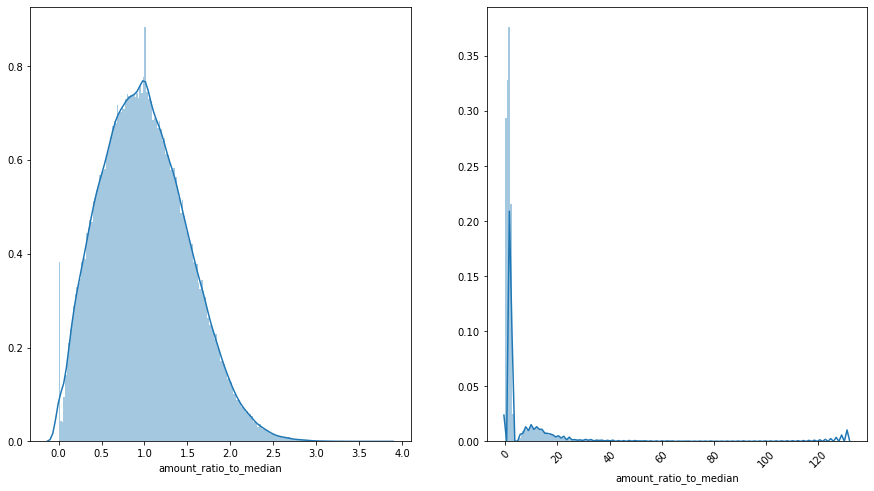

In [183]:
### show two plots on the the same page
fig, ((a,b)) = plt.subplots(1,2,figsize=(15,8))
plt.xticks(rotation=45)
sns.distplot(normal_ratio_to_median, bins=200, ax=a)
sns.distplot(abnormal_ratio_to_median, bins=200, ax=b)

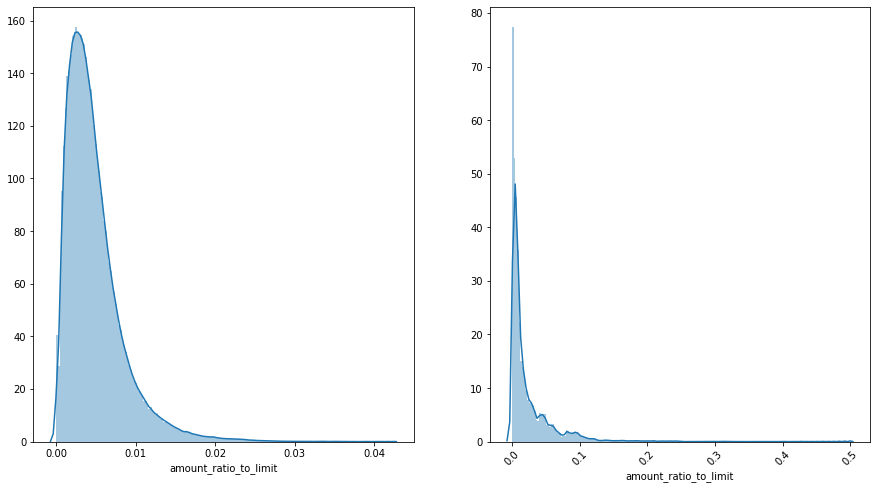

In [189]:
### show two plots on the the same page
fig, ((a,b)) = plt.subplots(1,2,figsize=(15,8))
plt.xticks(rotation=45)
sns.distplot(data['amount_ratio_to_limit'][data.label==1] , bins=200, ax=a)
sns.distplot(data['amount_ratio_to_limit'][data.label==-1] , bins=200, ax=b)

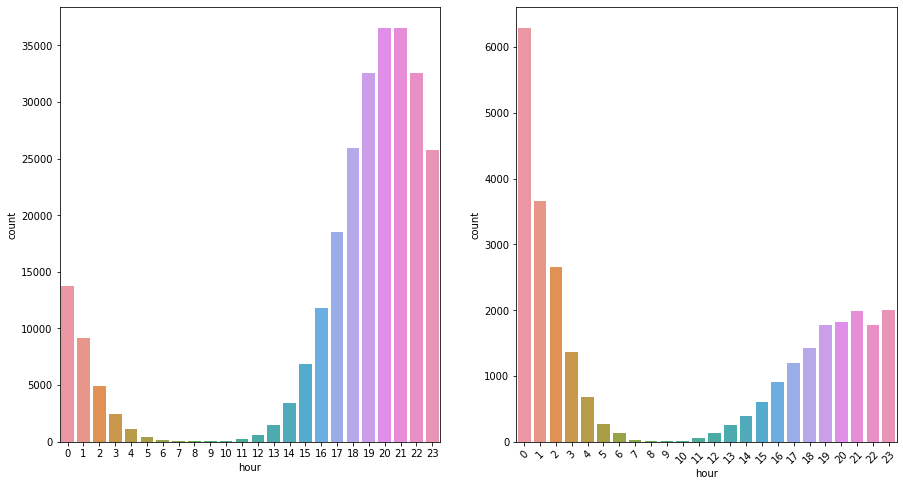

In [193]:
### comparison of the hour effect
fig, ((a,b)) = plt.subplots(1,2,figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data['hour'][data.label==1],ax=a)
sns.countplot(data['hour'][data.label==-1], ax=b)
# many of the fraud spending is done during mid night

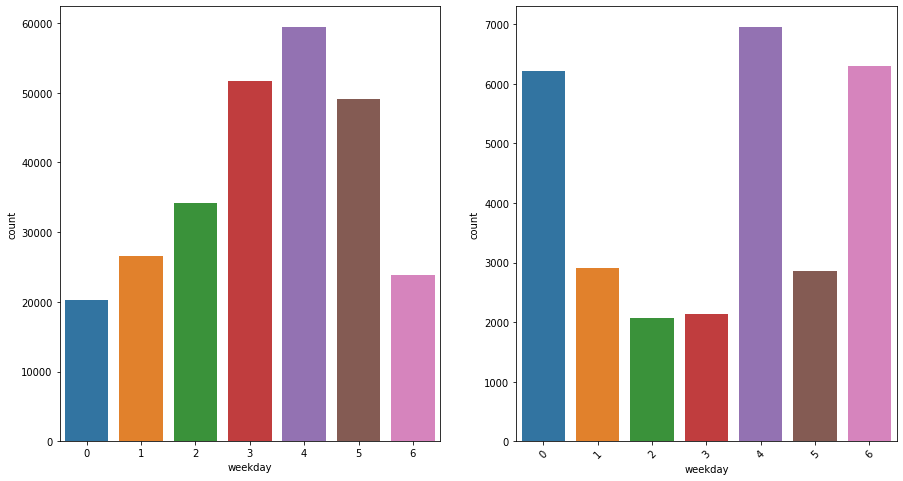

In [194]:
### comparison of the hour effect
fig, ((a,b)) = plt.subplots(1,2,figsize=(15,8))
plt.xticks(rotation=45)
sns.countplot(data['weekday'][data.label==1],ax=a)
sns.countplot(data['weekday'][data.label==-1], ax=b)
# many of the fraud spending is done during mid night

In [195]:
x = df_trans[features]
x

,month,hour,weekday,amount_ratio_to_median,amount_ratio_to_limit
0,9,0,4,0.467086,0.002189
1,10,22,5,1.100501,0.005158
2,10,18,0,0.517977,0.002427
3,10,19,3,1.452897,0.006809
4,10,20,0,0.766243,0.003591
...,...,...,...,...,...
294583,9,19,3,0.971666,0.021205
294584,8,21,3,0.648389,0.014150
294585,9,16,1,0.592180,0.012923
294586,8,18,3,1.100122,0.024008


In [196]:
# plot PCA:
scaler = StandardScaler()
norm_x = scaler.fit_transform(x)


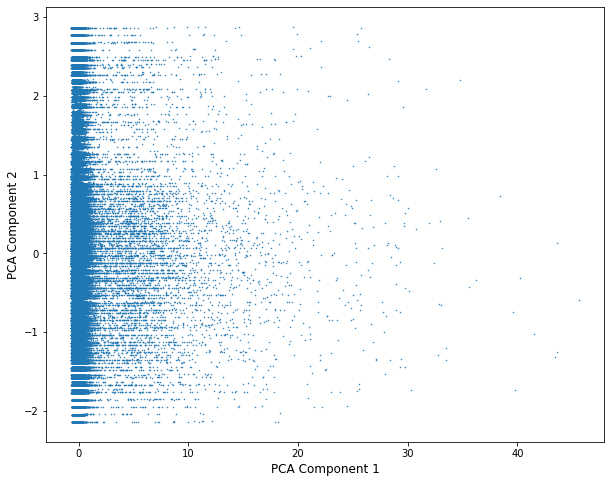

In [197]:
# first visualize PCA components with all data points. reduce dimension = 2
# after PCA, each of m*1 vector (m is the number of features will be reduced to 2*1)

# apply PCA
pca = PCA(n_components=2, random_state=42)
pca_x = pca.fit_transform(norm_x)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(pca_x[:, 0], pca_x[:, 1], '.', markersize=1)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
plt.show()


In [201]:
len(pca_x[:, 0]), len(x)

(294588, 294588)

In [202]:
inlier = pca_x[label == 1]
outlier = pca_x[label == -1]

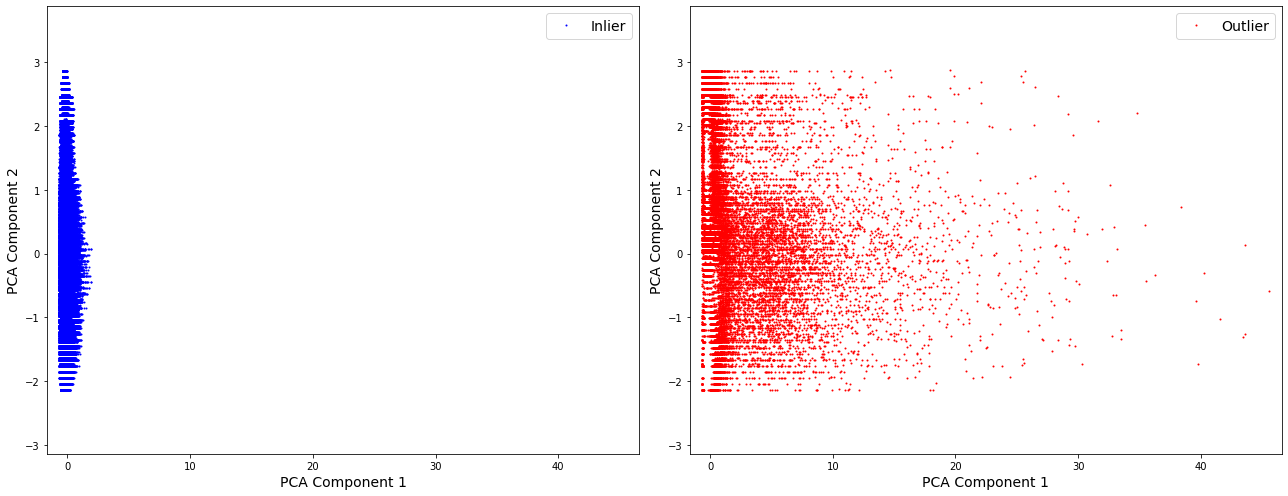

In [204]:
# now sperately visualize the two groups.
# we can see that the two groups are properly seperated.

xmin = pca_x[:, 0].min() - 1
xmax = pca_x[:, 0].max() + 1
ymin = pca_x[:, 1].min() - 1
ymax = pca_x[:, 1].max() + 1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax[0].plot(inlier[:, 0], inlier[:, 1], 'b.', markersize=2, label='Inlier')
ax[0].set_xlabel('PCA Component 1', fontsize=14)
ax[0].set_ylabel('PCA Component 2', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].set_xlim([xmin, xmax])
ax[0].set_ylim([ymin, ymax])
ax[1].plot(outlier[:, 0], outlier[:, 1], 'r.', markersize=2, label='Outlier')
ax[1].set_xlabel('PCA Component 1', fontsize=14)
ax[1].set_ylabel('PCA Component 2', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].set_xlim([xmin, xmax])
ax[1].set_ylim([ymin, ymax])
plt.tight_layout()
plt.show()

In [206]:
# let's try a different feature set:
features1 = ['month', 'hour', 'weekday','amount_diff', 'amount_ratio_to_limit']
data1 = df_trans[features1]


In [209]:
# build isolation forest model
forest = IsolationForest(n_estimators=20, max_samples='auto', contamination=0.1, 
                         max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42)
forest = forest.fit(data1)
score = forest.decision_function(data1)
label = forest.predict(data1)

In [210]:
Counter(label)

Counter({1: 265130, -1: 29458})

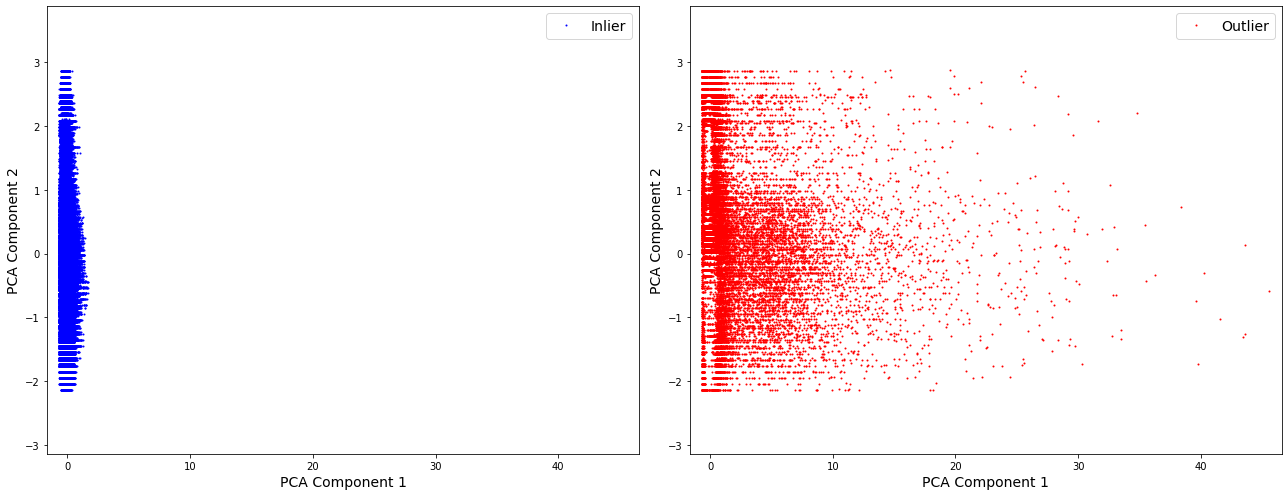

In [211]:
# now sperately visualize the two groups.
# we can see that the two groups are properly seperated.
inlier = pca_x[label == 1]
outlier = pca_x[label == -1]
xmin = pca_x[:, 0].min() - 1
xmax = pca_x[:, 0].max() + 1
ymin = pca_x[:, 1].min() - 1
ymax = pca_x[:, 1].max() + 1

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax[0].plot(inlier[:, 0], inlier[:, 1], 'b.', markersize=2, label='Inlier')
ax[0].set_xlabel('PCA Component 1', fontsize=14)
ax[0].set_ylabel('PCA Component 2', fontsize=14)
ax[0].legend(fontsize=14)
ax[0].set_xlim([xmin, xmax])
ax[0].set_ylim([ymin, ymax])
ax[1].plot(outlier[:, 0], outlier[:, 1], 'r.', markersize=2, label='Outlier')
ax[1].set_xlabel('PCA Component 1', fontsize=14)
ax[1].set_ylabel('PCA Component 2', fontsize=14)
ax[1].legend(fontsize=14)
ax[1].set_xlim([xmin, xmax])
ax[1].set_ylim([ymin, ymax])
plt.tight_layout()
plt.show()